<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Rossmann-Sales-Prediction-/blob/main/ML_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#Import Important Libraries.

#Data Import

In [ ]:
#Basic platform Libraries
import numpy as np
import pandas as pd
#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
#ML Algo Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Data set csv Files location. 
File1="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/Supervised ML-Regression/Copy of store.csv"

#Using Machine Learning to predict sales.
Without proper sales forecasting, many business decisions are based on unreliable estimates or instinct – which leads to many inefficiencies and missed opportunities. with forecating we can answer Questions like.
* How much stock should be ordered? 
* How much revenue can be expected in upcoming Year.? 

#What is sales forecasting?

* A sales forecast is an estimation of future sales. This estimation can be based on past values, economic indicators, seasonality, weather forecasts, promo, Assortment of product etc.

**Lets explore the dataset and coin out the features those will help our Model to predict the Sales of Rossmann stores with best Accuracy.**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Load Rossmann store Data set.
df0=pd.read_csv(File1)
#Load store Data set.
df1=pd.read_csv(File2,index_col="Store")

#Content Outline
* Understanding  Data Set
* Preprocessing and Feature Engineering 
* Understanding the problem and the data available
* Normality and skewness
* Missing values
* Dummy encoding
* Rescaling
#Regression
* Linear regression
* L1 regularisation
* L2 regularisation
* ElasticNet regularisation

#**1.Understanding Data set**

#Exploring Data sets.

**1** **Rossmann Data set**

In [ ]:
#Rossmann Data frame
print("(Rows, Columns)=",df0.shape)
df0.sample(1116)

(Rows, Columns)= (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
977606,537,2,2013-02-05,5114,561,1,1,0,0
42748,379,2,2015-06-23,2727,375,1,0,0,0
640200,976,4,2013-12-05,9544,859,1,1,0,0
306132,676,6,2014-10-18,4729,1064,1,0,0,0
590397,233,6,2014-01-18,7817,901,1,0,0,0
...,...,...,...,...,...,...,...,...,...
94416,757,5,2015-05-08,6619,599,1,1,0,0
934179,595,6,2013-03-16,16481,2063,1,0,0,0
700436,1002,6,2013-10-12,5619,733,1,0,0,0
168308,1059,2,2015-03-03,9980,1232,1,1,0,1


In [ ]:
#Stores Data Frame
print("(Rows, Columns)=",df1.shape)
df1.sample(5)

(Rows, Columns)= (1115, 9)


,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
970,a,a,910.0,12.0,2014.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
445,a,a,240.0,NaN,NaN,0,NaN,NaN,NaN
964,a,a,270.0,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
43,d,a,4880.0,NaN,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
780,a,a,18160.0,NaN,NaN,0,NaN,NaN,NaN


* **Instead of preparing each dataset individually lets merge them and prepare the features using single data set.**

#Merged DataSet

In [ ]:
#Merge Both Data sets on store.
df= df0.merge(df1 , on='Store' , how='left')
print(df.shape)

(1017209, 18)


In [ ]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [ ]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info

#Call the above function.
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
Store,int64,1115,0,1017209,0.000000
DayOfWeek,int64,7,0,1017209,0.000000
Date,object,942,0,1017209,0.000000
Sales,int64,21734,0,1017209,0.000000
Customers,int64,4086,0,1017209,0.000000
Open,int64,2,0,1017209,0.000000
Promo,int64,2,0,1017209,0.000000
StateHoliday,object,5,0,1017209,0.000000
SchoolHoliday,int64,2,0,1017209,0.000000
StoreType,object,4,0,1017209,0.000000


**Observations:-**
* Features with Datatype string are (Date,StateHoliday,StoreType,Assortment and Promointerval.)
* Features with majority of nulls in them are (Promo2Since week,Promo2SinceYear,Promonterval,competitionOpenSinceMonth,CompetitionOpenSinceYear)
* From the description and the unique Elements in the Features we come to know that we have lots of categorical based features.
* Our Target variable "Sales" is a Continuous Type.

* **Lets Dig deeper into our Data set and performe some operations to clean these features and make them suitable to visualize and use them in best of their availability.**

#**2.Preprocessing & Feature Enigeering.**


 

#Feature Transformation

In [ ]:
#get the unique values for features in data set.
columns = list(df.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print(i)
    print(df[i].unique())

Store
[   1    2    3 ... 1113 1114 1115]
DayOfWeek
[5 4 3 2 1 7 6]
Sales
[ 5263  6064  8314 ...   660 17815 23303]
Customers
[ 555  625  821 ... 3900   36 4065]
Open
[1 0]
Promo
[1 0]
StateHoliday
['0' 'a' 'b' 'c' 0]
SchoolHoliday
[1 0]
StoreType
['c' 'a' 'd' 'b']
Assortment
['a' 'c' 'b']
CompetitionOpenSinceMonth
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2
[0 1]
Promo2SinceWeek
[nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear
[  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
df.sample(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
321275,892,4,2014-10-02,9388,1040,1,1,0,0,a,a,19370.0,4.0,2002.0,0,NaN,NaN,NaN
55358,724,5,2015-06-12,6515,676,1,0,0,0,d,c,5900.0,NaN,NaN,0,NaN,NaN,NaN
374213,462,3,2014-08-06,5272,680,1,1,0,1,a,a,44320.0,8.0,2008.0,0,NaN,NaN,NaN
679798,434,3,2013-10-30,7297,639,1,0,0,1,a,a,13020.0,8.0,2003.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
579729,715,2,2014-01-28,5046,568,1,0,0,0,a,a,14810.0,6.0,2014.0,0,NaN,NaN,NaN
506544,5,4,2014-04-03,4853,605,1,1,0,0,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
248304,845,5,2014-12-19,7114,453,1,1,0,0,d,a,7860.0,11.0,2005.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
212492,643,4,2015-01-22,6480,904,1,0,0,0,a,a,230.0,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov"
566711,1077,7,2014-02-09,0,0,0,0,0,0,a,a,3750.0,11.0,2001.0,1,35.0,2010.0,"Mar,Jun,Sept,Dec"
698380,61,7,2013-10-13,0,0,0,0,0,0,a,c,350.0,12.0,2007.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"


**DayOfWeek**
* It representsents Day of Week like 1=Monday,2=Tuesday,3=Wednesday,4=Thrusday,5=Friday,6=Saturday,7=Sunday.

* **We will verify our above assumption of Days with Sales and Holiday that 7=Sunday.**


In [ ]:
df.DayOfWeek.value_counts()

**Date**
* Date itself  is not very useful to us we need months Days and Years to track our sales and customers mood.  
* Extract Day, year , months from Date and drop the Date feature itself.

In [ ]:
df.Date[1]

'2015-07-31'

In [ ]:
#Create new features Year and month out of Date.
df['year'] = df['Date'].apply(lambda x : int(str(x)[0:4]))
df['month'] = df['Date'].apply(lambda x : int(str(x)[5:7]))
df["Day"]=df["Date"].apply(lambda x: int(str(x)[8:10]))

In [ ]:
#Drop the Date feature
df.drop(["Date"], axis='columns', inplace=True)

* **We added 3 New Features into our Data set & removed 1 Feature Date.**

**StateHoliday**
*  In the stateHoliday a = public holiday, b = Easter holiday, c = Christmas holiday, 0 = No State Holidays. 
* Hence we can consider a,b,c as holiday and imput them with 1.
* Then convert column into numeric type


In [ ]:
print(df["StateHoliday"].unique())


['0' 'a' 'b' 'c' 0]


In [ ]:
#Convert the a,b,c into 1 as they represent Holiday
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
df["StateHoliday"] = df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

df["StateHoliday"] = df["StateHoliday"].astype(int)

* **By doing the above Imputation and conversion we get a categorical values of 0 & 1 for StateHoliday.**

In [ ]:
#cout
df["StateHoliday"].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

#Handling Missing Values.


In [ ]:
df.shape

(1017209, 20)

In [ ]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
Day                               0
dtype: int64

**Handling the Missing Value**
* Fill CompetitionDistance with median value.
* Fill CompetitionOpenSinceMonth & CompetitionOpenSinceYear with mode.
* Fill Promo2SinceWeek ,Promo2SinceYear , PromoInterval with repective median values.
* Fill PromoInterval with mode values.





In [ ]:
#Handle missing values 
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode().iloc[0])
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode().iloc[0])
df['Promo2SinceWeek']=df['Promo2SinceWeek'].fillna(df['Promo2SinceWeek'].median())
df['Promo2SinceYear']=df['Promo2SinceYear'].fillna(df['Promo2SinceYear'].median())
df['PromoInterval']=df['PromoInterval'].fillna(df['PromoInterval'].mode().iloc[0])

In [ ]:
df['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
df.PromoInterval.isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1017209 non-null  float64
 11  CompetitionOpenSinceMonth  1017209 non-null  float64
 12  CompetitionOpenSinceYear   1017209 non-null  float64
 13  Promo2      

* **We will analyse the above imputed features and will give them place in our selected features only if they can satisfy our assumptions.**



**StoreType, Assortment, PromoInterval**


In [ ]:
print(df.StoreType.unique())
print(df.Assortment.unique())
print(df.PromoInterval.unique())

['c' 'a' 'd' 'b']
['a' 'c' 'b']
['Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


* **We will impute the values in these features with dummies.**

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['StoreType']= label_encoder.fit_transform(df['StoreType'])
df['Assortment']= label_encoder.fit_transform(df['Assortment'])
df['PromoInterval']= label_encoder.fit_transform(df['PromoInterval'])

#Outliers


**Handling outliers**
* Start with our target variable as it is the most important variable.
* Then we will explore other Numerical based variables like Customers, competition distance and all.
* This Data set have some geniune values which seems as outliers. so we will be working on only those values which is very impotant  to remove and removal of those will does not affect or data set.

**1** **Sales and Customers**

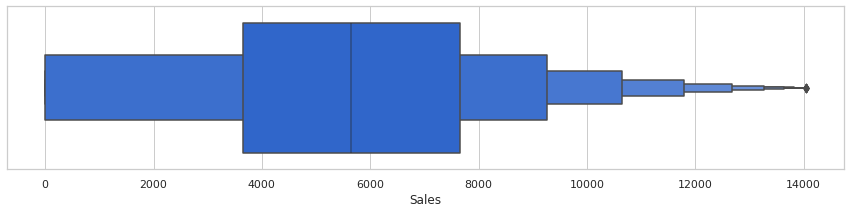

In [ ]:

sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df["Sales"],color='#175ee3')

plt.show()

* Customers is the only feature which has linear relation with Sales.Hence it is the most important for our linear regression.
* Hence regulate the feature in such a way that it would provide accurate result.

**Remove Outliers**

In [ ]:
percentile_25 = np.percentile(df['Sales'],25)
percentile_75 = np.percentile(df['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr

df.drop(index=df[df['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
df.drop(index=df[df['Sales']<lower_outlier_bound].index,axis=0,inplace=True)


**Obervation:-**
We can drop the sales datapoints which are greater than 35k as they are very less percentage of the dataset and are probably outliers for our Algo.


**Drop Outliers**


**2** **Customers**

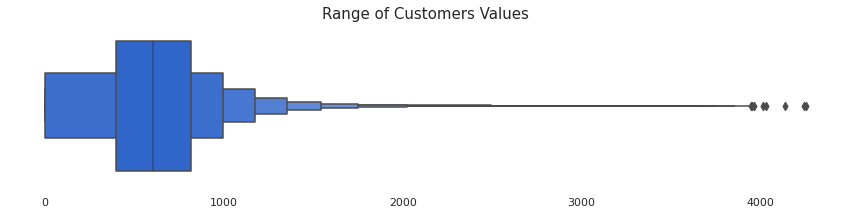

In [ ]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['Customers'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
  spine.set_visible(False)

In [ ]:
#Customers above 5000
df_mask2=df.loc[(df['Customers']>=5000) & (df["Sales"]<30000)]

df_mask2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,Day


**Obervation:-**We can drop the Customers datapoints which are greater than 2500 as they are very less percentage of the dataset and are probably outliers.

**Drop Outliers**

**CompetitionOpenSinceYear**
* In real world scenario it is possible to have these values as exceptionals.But for the ML algos and they may create problem.
* This feature seems to have an outlier for the model. 
* Hence we remove only those values Removal of which does not affect the original data. And also which are at extreme point.

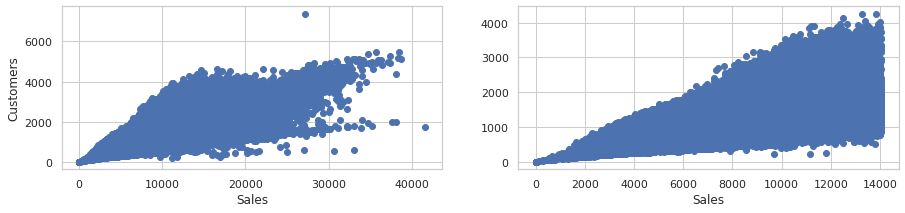

In [ ]:
# Scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df0['Sales'], df0['Customers'])
ax2.scatter(df['Sales'], df['Customers'])

# x-axis label
ax1.set_xlabel('Sales')
ax2.set_xlabel('Sales')
 
# y-axis label
ax1.set_ylabel('Customers')
plt.show()

**CompetitionOpenSinceYear**

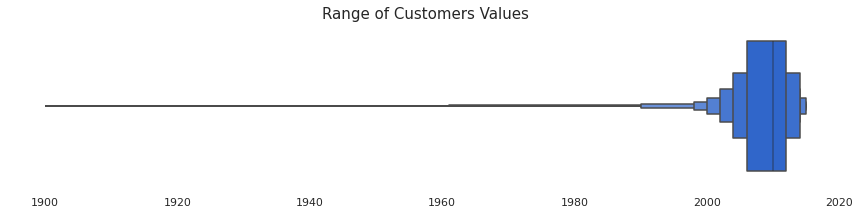

In [ ]:
sns.set_theme(rc={'figure.figsize': (15,3)},style='whitegrid')
sns.boxenplot(x=df['CompetitionOpenSinceYear'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [ ]:
#Drop CompetitionOpenSinceYear value below 1980
df.drop(df.loc[df['CompetitionOpenSinceYear'] < 1980].index,inplace=True)

**CompetitionDistance**

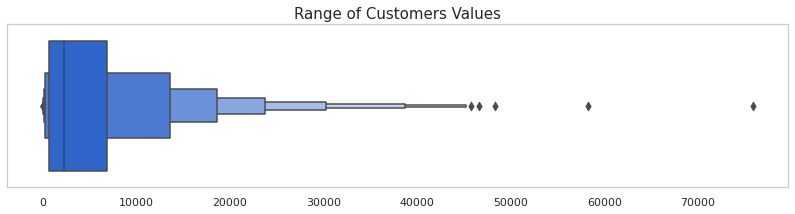

In [ ]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df1['CompetitionDistance'],color='#175ee3')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
# for spine in ax.spines.values():
#   spine.set_visible(False)

In [ ]:
#Drop CompetitionOpenSinceYear value below 1980
df.drop(df.loc[df['CompetitionDistance'] > 55000].index,inplace=True)

**Conclusion:-**
* We have converted the data type in usable formate.
* hadled the missing values.
* Deal with categorical values.
* Handled outliers 

**GREAT ! we can move head towards understanding our Data set for further exploration using visualization** 

In [ ]:
df.shape

(983315, 20)

#**EDA With Data Visualization**

**Target Distribution in Features**
1Continuous Features



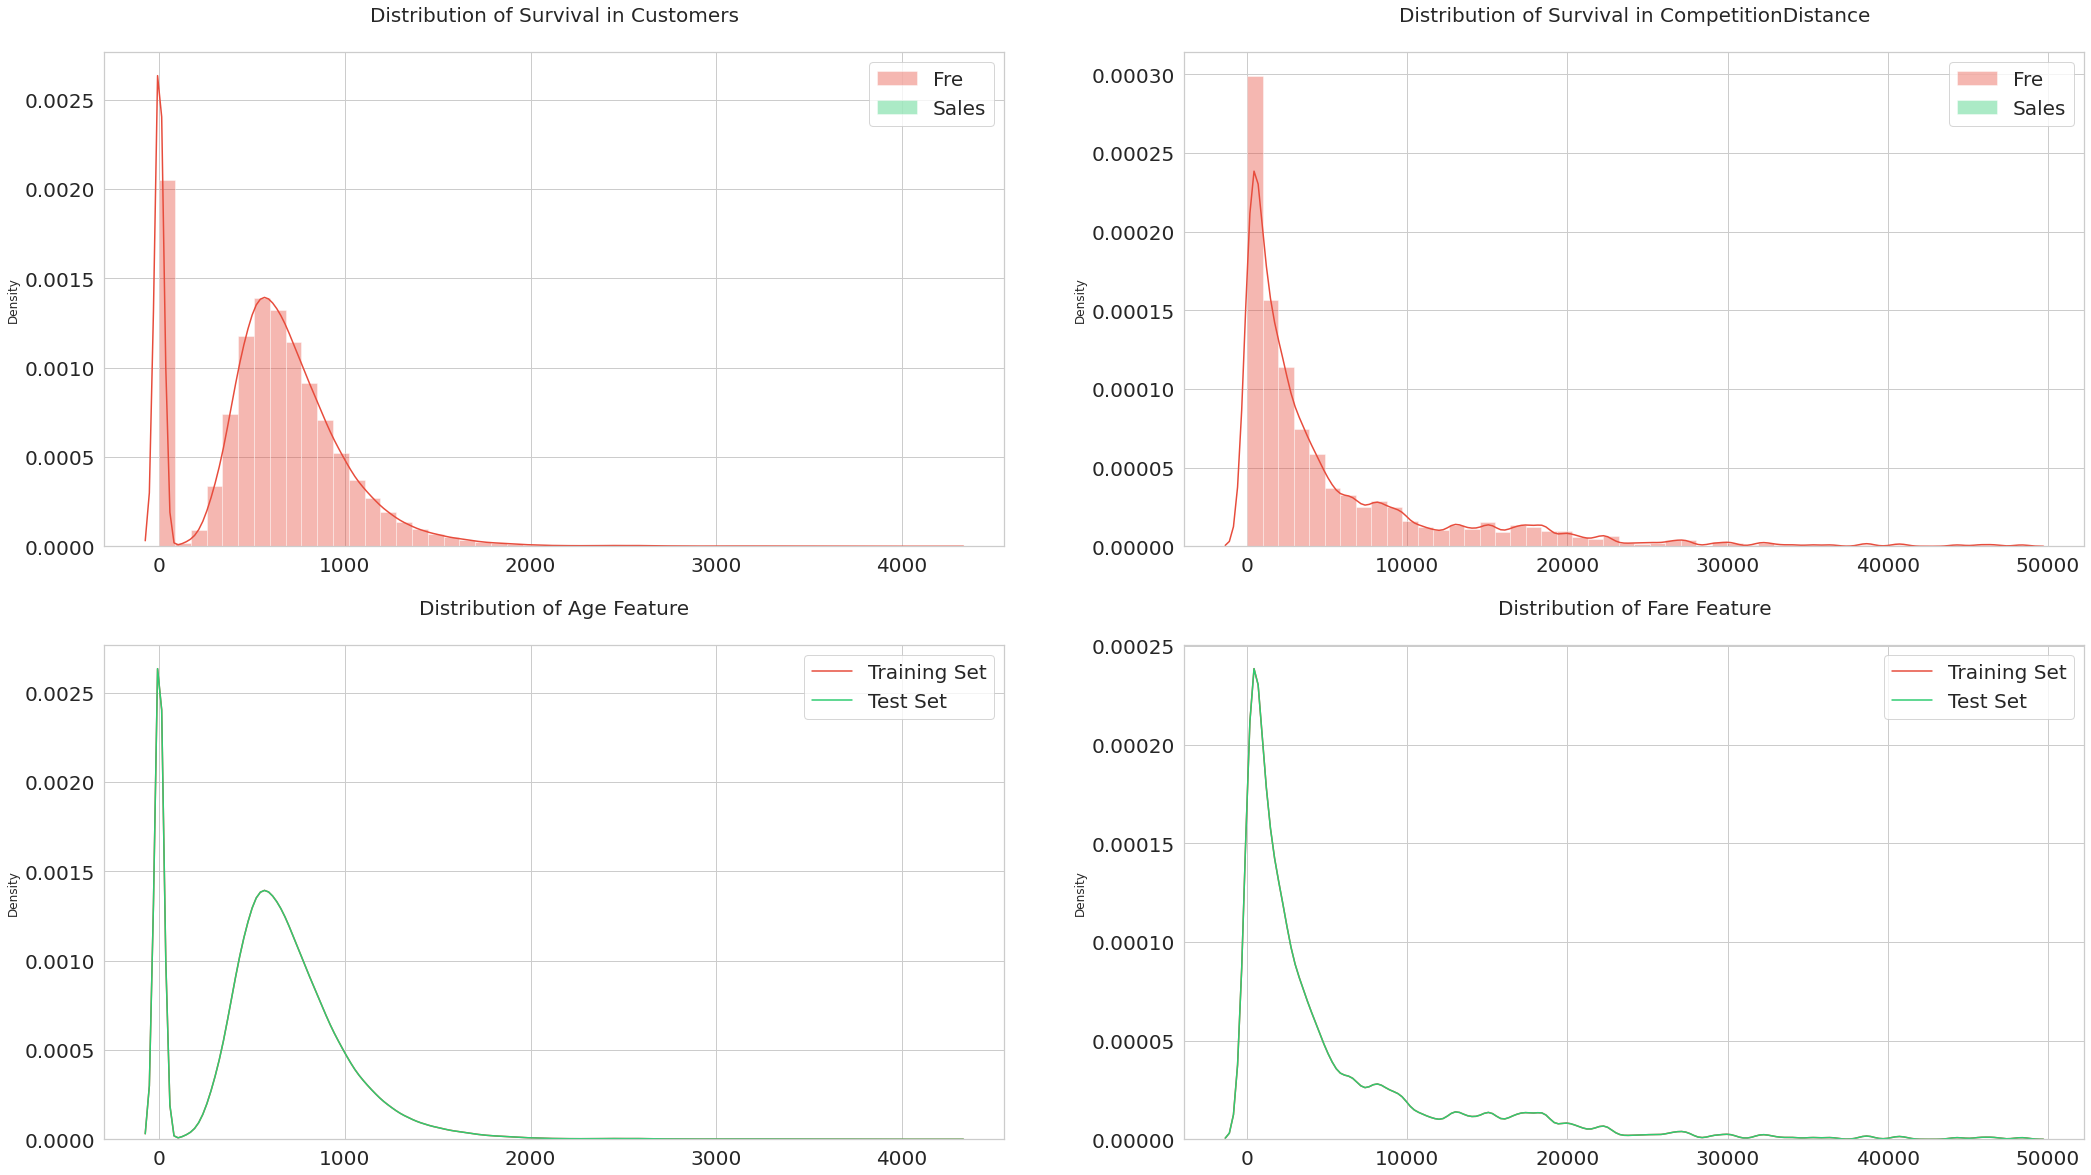

In [ ]:
cont_features = ['Customers','CompetitionDistance']
surv = df['Sales']==1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(df[~surv][feature], label='Fre', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(df[surv][feature], label='Sales', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(df[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

In [ ]:
df["Sales"]=df['Sales'].drop(df["Sales"]==0,axis=1,inplace=True)

ValueError: ignored

**Categorical Features with sales

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'Day'],
      dtype='object')

#Independent Variable Selection.

In [ ]:
## Select the ones you want
Select_df=df[['Store', 'DayOfWeek', 'Sales', 'Customers',  'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear',  'year', 'month',
       'Day', 'StoreType',
       'Assortment']]

KeyError: ignored

In [ ]:
#Corr map
correlation = Select_df.corr()
correlation

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year,month,Day,StoreType,Assortment
Store,1.000000,0.000671,0.007670,0.034066,-0.000165,0.003235,0.000457,-0.014589,-0.037572,0.001774,0.006588,0.010075,0.025621,0.000346,0.001640,-0.000115,-0.020714,0.009491
DayOfWeek,0.000671,1.000000,-0.178362,-0.096977,-0.289065,-0.001476,-0.139133,0.002520,0.000889,0.001441,-0.002849,-0.000555,0.002673,0.002103,-0.019819,0.008462,-0.001605,0.000803
Sales,0.007670,-0.178362,1.000000,0.823631,0.368106,0.020599,0.038050,-0.039996,-0.036046,0.025527,-0.128477,0.049883,-0.008641,0.036443,0.073277,-0.051861,-0.016228,0.109294
Customers,0.034066,-0.096977,0.823631,1.000000,0.182771,0.050497,0.024368,-0.163392,-0.034677,0.009536,-0.202239,0.022466,0.044130,-0.000586,0.053532,-0.035426,-0.194548,0.006994
Promo,-0.000165,-0.289065,0.368106,0.182771,1.000000,0.002765,0.028879,-0.000896,-0.000511,-0.000702,-0.000508,-0.000888,-0.001470,0.024000,-0.006376,-0.126450,0.000129,-0.000138
StateHoliday,0.003235,-0.001476,0.020599,0.050497,0.002765,1.000000,0.012604,0.004824,0.003629,0.001365,-0.009665,-0.004491,0.005140,0.002318,0.001287,-0.007909,-0.003679,-0.001156
SchoolHoliday,0.000457,-0.139133,0.038050,0.024368,0.028879,0.012604,1.000000,-0.003409,-0.000551,-0.000133,-0.008397,-0.003297,-0.001480,-0.038695,0.118487,0.038133,-0.002447,-0.002620
CompetitionDistance,-0.014589,0.002520,-0.039996,-0.163392,-0.000896,0.004824,-0.003409,1.000000,-0.046651,0.009349,-0.134200,-0.036117,-0.043139,0.000540,0.003123,-0.000419,0.094836,0.141689
CompetitionOpenSinceMonth,-0.037572,0.000889,-0.036046,-0.034677,-0.000511,0.003629,-0.000551,-0.046651,1.000000,0.036486,0.021132,0.007700,0.009586,-0.000664,-0.001282,0.000200,0.037122,0.035897
CompetitionOpenSinceYear,0.001774,0.001441,0.025527,0.009536,-0.000702,0.001365,-0.000133,0.009349,0.036486,1.000000,0.003758,0.040075,0.018122,0.000227,0.000461,-0.000005,0.053707,0.111407


**Conslusion**
* Look for correlation of rows where the dependent variable (Sales in this case) is not involved because if a variable is correlated with the dependent variable then this would be a good sign for our model. 
* Correlation within dependent variables is what we need to look for and avoid. * This data doesn't contain perfect multicollinearity among independent variables. 

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = Select_df.drop(["Sales"],axis=1)
calc_vif(X)

,variables,VIF
0,Store,4.037120e+00
1,DayOfWeek,5.768537e+00
2,Customers,5.429088e+00
3,Promo,2.065405e+00
4,StateHoliday,1.004194e+00
5,SchoolHoliday,1.284642e+00
6,CompetitionDistance,1.679860e+00
7,CompetitionOpenSinceMonth,8.990602e+00
8,CompetitionOpenSinceYear,2.338271e+05
9,Promo2,2.179577e+00


**Conclusion:-**
* An infinite value of VIF for a given independent variable indicates that it can be perfectly predicted by other variables in the model.
* Hence for now we will discard the StoreTypes & Assortments.

**So Our Selected Independent variables are**

 **{'Store', 'DayOfWeek', 'Sales', 'Customers','Promo','SchoolHoliday', 'CompetitionDistance',CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear',  'year', 'month',
       'Day',}**

#Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

 # Linear Regression



Linear Regression is the simplest algorithm in machine learning, it can be trained in different ways. In this notebook we will cover the following linear algorithms:

* Linear Regression
* Ridge Regression
* LASSO Regression


In [ ]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest


**Fitting the Linear Model**

In [ ]:
x = Select_df.drop(["Sales"],axis=1)
y = Select_df.Sales

In [ ]:
#Scale the Features.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

**Train Test Split**

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math



X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((672928, 17), (672928,))

**1.Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)

LinearRegression(normalize=True)

**Evaluate Matrices**

In [ ]:
test_pred = LR_model.predict(X_test)
train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 1036.2090866188737
MSE: 2227557.939525402
RMSE: 1492.5005660050526
R2 Square 0.7676827563827706
__________________________________
Train set evaluation:
_____________________________________
MAE: 1038.6746933441752
MSE: 2269682.0129825505
RMSE: 1506.5463859379008
R2 Square 0.7648833368884441
__________________________________


**2. Mean of Residuals**

* Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [ ]:
residuals = y_train.values-train_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.8251358109951145e-12


**Note:-**Very close to zero so all good here.

**4. Check for Normality of error terms/residuals**

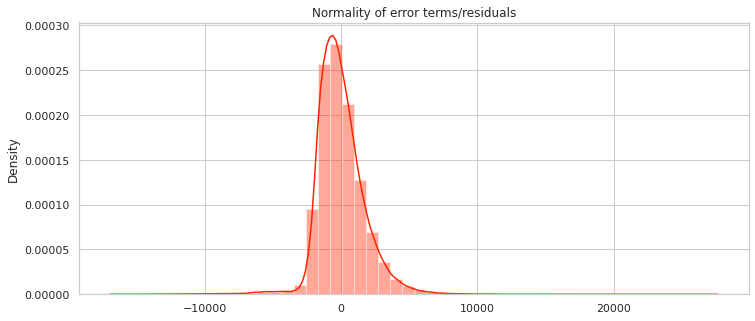

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

**The residual terms are pretty much normally distributed for the number of test points we took. Remember the central limit theorem which says that as the sample size increases the distribution tends to be normal. A skew is also visible from the plot. It's very difficult to get perfect curves, distributions in real life data.**

**Conclusion:-**
* Over Data is as such that our Linear model is not able to performe well in it.
* Apply cross validation and check different accuracy.


#CROSS VALIDATION
* As you know in KNN method we use train test split with random_state that split exactly same at each time. However, if we do not use random_state, data is split differently at each time and according to split accuracy will be different. Therefore, we can conclude that model performance is dependent on train_test_split. For example you split, fit and predict data 5 times and accuracies are 0.89, 0.9, 0.91, 0.92 and 0.93, respectively. Which accuracy do you use? Do you know what accuracy will be at 6th times split, train and predict. The answer is I do not know but if I use cross validation I can find acceptable accuracy.
Cross Validation (CV)

* K folds = K fold CV.

* When K is increase, computationally cost is increase
* cross_val_score(LR_model,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)

In [ ]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5



cv_result = cross_val_score(LR_model,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.74454709 0.76544828 0.76334473 0.76800975 0.77196045]
CV scores average:  0.7626620621480062


#Regularized Regression with Hyper parameter Tunning.
**As we learn linear regression choose parameters (coefficients) while minimizing lost function. If linear regression thinks that one of the feature is important, it gives high coefficient to this feature. However, this can cause overfitting that is like memorizing in KNN. In order to avoid overfitting, we use regularization that penalize large coefficients.**

**Ridge regression:** First regularization technique. Also it is called L2 regularization.
* Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
alpha is parameter we need to choose to fit and predict. alpha is hyperparameter that we need to choose for best accuracy and model complexity. **This process is called hyperparameter tuning.**
* What if alpha is zero? lost function = OLS so that is linear rigression 
* If alpha is small that can cause overfitting
* If alpha is big that can cause underfitting. 

**Lasso regression:** Second regularization technique. Also it is called L1 regularization.
* Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
* It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression




#Lasso Reg

**Models**
Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both l_1(Lasso) and l_2(Ridge) regularization. I'll also define a function that returns the cross-validation rmse error so we can evaluate our models and pick the best tuning par

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# lasso = Lasso()
# parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
# lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)


lasso = Lasso(selection='random',random_state=0)
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

test_pred = lasso_regressor.predict(X_test)
train_pred = lasso_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

NameError: ignored

In [ ]:
print('Lasso score: ',model.score(X_test,y_test))
print('Lasso coefficients: ',model.coef_)

Lasso score:  0.7459381735566322
Lasso coefficients:  [ -56.56207522 -119.72348923 2495.45426042  650.24150325   14.51213709
  298.78061624  -16.52234532   52.30304313  135.31039634   80.27060372
  -85.81220982  136.24514392  134.96826821    8.67585261]


#Ridge Reg

In [ ]:
from sklearn.linear_model import Ridge


ridge = Ridge()
parameters = {'alpha': [1e-8,1e-5,1e-4,1e-3,1e-2,1,5]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)


test_pred = ridge_regressor.predict(X_test)
train_pred = ridge_regressor.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

Test set evaluation:
_____________________________________
MAE: 1274.5623862237521
MSE: 3075838.656368912
RMSE: 1753.8069039574773
R2 Square 0.679213570260178
__________________________________
Train set evaluation:
_____________________________________
MAE: 1273.707239678606
MSE: 3106885.195640964
RMSE: 1762.6358658670724
R2 Square 0.6781573472885372
__________________________________


In [ ]:
print('Lasso score: ',model.score(X_test,y_test))
print('Lasso coefficients: ',model.coef_)

Lasso score:  0.7459392376066603
Lasso coefficients:  [ -56.66891189 -119.77895958 2495.58361814  650.31129223   14.58696744
  298.91501037  -16.62171075   52.40121982  135.45029172   80.34944856
  -85.8740041   136.37972235  135.09352132    8.78692481]


#Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)




Test set evaluation:
_____________________________________
MAE: 451.31425650292454
MSE: 473790.15225403017
RMSE: 688.3241621896112
R2 Square 0.9505873134558759
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
__________________________________


**Observation:-**
The decision tree regressor performing well compared to Linear

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)



RandomForestRegressor()

In [ ]:
test_pred = random_forest_model.predict(X_test)
train_pred = random_forest_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 1224.4610611785963
MSE: 2834427.3013882404
RMSE: 1683.575748633913
R2 Square 0.7043909268495915
__________________________________
Train set evaluation:
_____________________________________
MAE: 1207.4701103575933
MSE: 2701152.719977805
RMSE: 1643.5183966046152
R2 Square 0.7201872286764397
__________________________________


In [ ]:
# Performance of the model

# print('r2_score:',r2_score(y_test,y_predict))
# print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
# print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Observation:**
Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.

#Understanding the important features

In [ ]:
# features used
columns = list(X_train.columns)
columns

In [ ]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.feature_importances_
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

In [ ]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

**Gradient Boosting**
We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

* The average value of the target column and uses as an initial prediction every input.
* The residuals (difference) of the predictions with the targets are computed.
* A decision tree of limited depth is trained to predict just the residuals for each input.
* Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
* Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
* Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.
* The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). 
* The term "boosting" refers the general technique of training new models to improve the results of an existing model.

* To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
from xgboost import XGBRegressor
XGBmodel = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=100, max_depth=4)

# %%time
XGBmodel.fit(X_train, y_train)


# y_predict = XGBmodel.predict(X_test)
# r2_score(y_test, y_predict)

In [ ]:
test_pred = XGBmodel.predict(X_test)
train_pred = XGBmodel.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

**Feature importance**
* Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': columns,
    'importance': XGBmodel.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df

#Models Comparison

In [ ]:

results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))